# 2.1 Решающие деревья

In [125]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Научимся с помощью дерева решений предсказывать переменную $Y$, основываясь на переменных $X_1$ и $X_2$.

Для обучения решающих деревьев нам понадоибтся новый модуль:
```python
from sklearn import tree
```

Подготовим данные для простейшего примера.

In [126]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


У нас есть две переменные $X_1$, $X_2$ и $Y$, принимающие значения $0$ или $1$. То есть их можно воспринимать как некие бинарные номинативные переменные.

Наша с вами задача: научиться при помощи дерева решений предсказывать значения переменной $Y$, основываясь на значениях переменной $X_1$ и $X_2$.

Дерево решений часто сравнивают с тем, как мыслит человек, точнее способ как дерево решений предоставляет некоторые результаты обученной модели. Поэтому давайте сейчас обучим дерево решений в нашей голове.

Посмотрим наши данные.

Если $X_1 = 1$, то $Y$ чаще всего тоже равно $1$. В обратном случае если $X_1 = 0$, то $Y$ чаще всего тоже равно $0$.

Давайте посмотрим как дерево решений справится с этой задачей.

In [127]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [128]:
X = data[['X_1', 'X_2']]
y = data.Y

In [129]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Внешне ничего не поменялось. Но если у нас раньше было пустое, ничего не знающее, одинокое дерево решений, которое только знало как можно чему-то обучаться, но не знало ничего ни про наши $X$ и $Y$, ни про наши данные. То теперь мы дали ему переменные, в которых есть какая-то хитрая взаимосвязь, позволяющая предсказать $y$.

И вот дерево решений довольно быстро обучилось. Внешне это не очень заметно, но давайте теперь попробуем вытащить те знания, которые дерево решений сформировало по нашим данным.

Самый простой способ понять чему научилось дерево решений - визуализировать это дерево.

## Визуализируем наше дерево

Я сейчас не хочу отдельно подробно останавливаться на том коде, который был использован для визуализации. Как нарисовать дерево можно посмотреть [здесь](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

In [130]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

Были проблемы с установкой пакета `graphviz`. Не получалось установить пакет ни с помощью Anaconda Navigator, ни с помощью `conda` в командной строке, ни с помощью `pip3`. Появлялась ошибка:

```
Collecting package metadata: failed

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/msys2/win-64/repodata.json.bz2>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

SSLError(MaxRetryError('HTTPSConnectionPool(host=\'repo.anaconda.com\', port=443): Max retries exceeded with url: /pkgs/msys2/win-64/repodata.json.bz2 (Caused by SSLError("Can\'t connect to HTTPS URL because the SSL module is not available."))'))
```

Нашел решение [здесь](https://github.com/conda/conda/issues/6007). Нужно было всего лишь использовать **Anaconda Prompt** для установки пакетов, а не командную строку Windows. 

Так же для того, чтобы не нужно было каждый раз прописывать путь к исполняемому файлу в переменных ОС (Path), можно использовать команду Python:

```Python
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/kes/Anaconda3/Library/bin/graphviz'# (укажите свой путь до bin для graphviz)
```



In [131]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

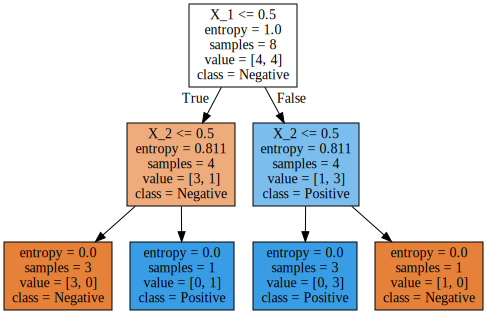

In [132]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative', 
                                               'Positive'],
                                   filled=True))
display(SVG(graph.pipe(format='svg')))

Давайте посмотрим на то, что у нас получилось.

Так выглядит обученное нами дерево решений. Из графика мы видим, как обученное нами дерево решений научилось разделять наблюдения на те, у которых $y = 0$ и те, у которых $y = 1$, используя данные про наши переменные $X_1$ и $X_2$.

Давайте быстренько посмотрим какие тут у нас ключевые слова.

Для удобства восприятия в код были добавлены лейблы `Positive` и `Negative` для удобства восприятия. $y = 1$ будет `Positive`, а $y = 0$ будет `Negative`.

В самом начале у нас верхний белый квадрат - было 4 наблюдения с классом 0, 4 наблюдения с классом 1. Энтропия при этом у нас равна единице, а вопрос, который мы задаём на этом шаге - "Правда ли что $X_1 \leq 0.5$?".

И если это правда, т.е. когда $X_1 = 0$, то мы видим, что у нас преобладает класс `Negative`. Мы попадаем в левую ветку - 3 наблюдения будут 0 и одно наблюдение - 1.

А вот в обратном случае, т.е. когда $X_1 = 1$ мы попадаем в правую ветку и у нас преобладает класс `Positive`. При этом 3 наблюдения будут 1 и одно - 0.

Поскольку в квадратах на втором уровне присутствует по 4 значения, относящихся к двум различным группам - дереву решений нужно классифицировать эти оставшиеся значения.

Следующий вопрос, который задаётся - "Правда ли что $X_2 \leq 0.5$".

В этом случае все значения, которые меньше 0.5 попадают в класс `Negative`, а значения больше 0.5 - в класс `Positive`.

Это позволяет нам безошибочно разделить все наши точки на те, у которых $y=0$ или $y=1$.

Осталось только понять как дерево решений это сделало, что за энтропия тут появляется. Она максимальна в самом начале работы алгоритма. И равна нулю когда мы однозначно классифицировали наши наблюдения

Интересно как дерево определило в каком порядке нужно рассматривать фичи, ведь оно выбрало сначала наблюдения $X_1$ и только потом $X_2$. А что было бы, если бы фич было не две, а десять?

По этой формуле можно посчитать энтропию:

$$E(Y) = - \sum_{i=1}^K p_i \log_2 (i)$$

А по этой информационный выигрыш (Information Gain):

$$IG(Y, X) = E(Y) - E(Y|X)$$

Итак, стратегия проста. Сначала, с помощью данных в столбце $Y$, мы находим энтропию. Как? Очень прсто. За $p_i$ берем долю элементов класса $i$ среди всех элементов, подставляем в формулу для $E(Y)$ и энтропия найдена. Затем мы начинаем последовательно перебирать все признаки, которые могут помочь нам уменьшить неопределенность. С помощью вопросов типа: "Правда ли что $X_2 \leq 0.5$", мы разделяем наши данные на две группы, в которых снова считаем энтропию по тому же принципу: подсчитываем $p_i$ для элементов класса $i$, которые попали в левую ветку дерева и то же самое для правой ветки. Затем по формуле, находим Information Gain. Тот признак, у которого IG самый высокий, и станет первым, по котором будет произведено разделение наблюдений.